<a href="https://colab.research.google.com/github/chaehyeon119/DataScience/blob/main/%EC%A1%B0%EB%B3%84%EC%8B%A4%EC%8A%B501_%EC%9A%B8%EB%A6%89%EB%8F%84_%EA%B8%B0%EC%98%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B5%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) 히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기<br>
2) 상자그림을 활용한 최고 기온 vs 서울 최고 기온<br>
3) 월별 최고기온 상자 그림 그리기<br>
4) 특정 달의 일별 최고 기온 상자 그림 그리기



#울릉도

1) 히스토그램을 활용한 울릉도의 최고기온, 최저기온, 평균기온 분포 확인하기

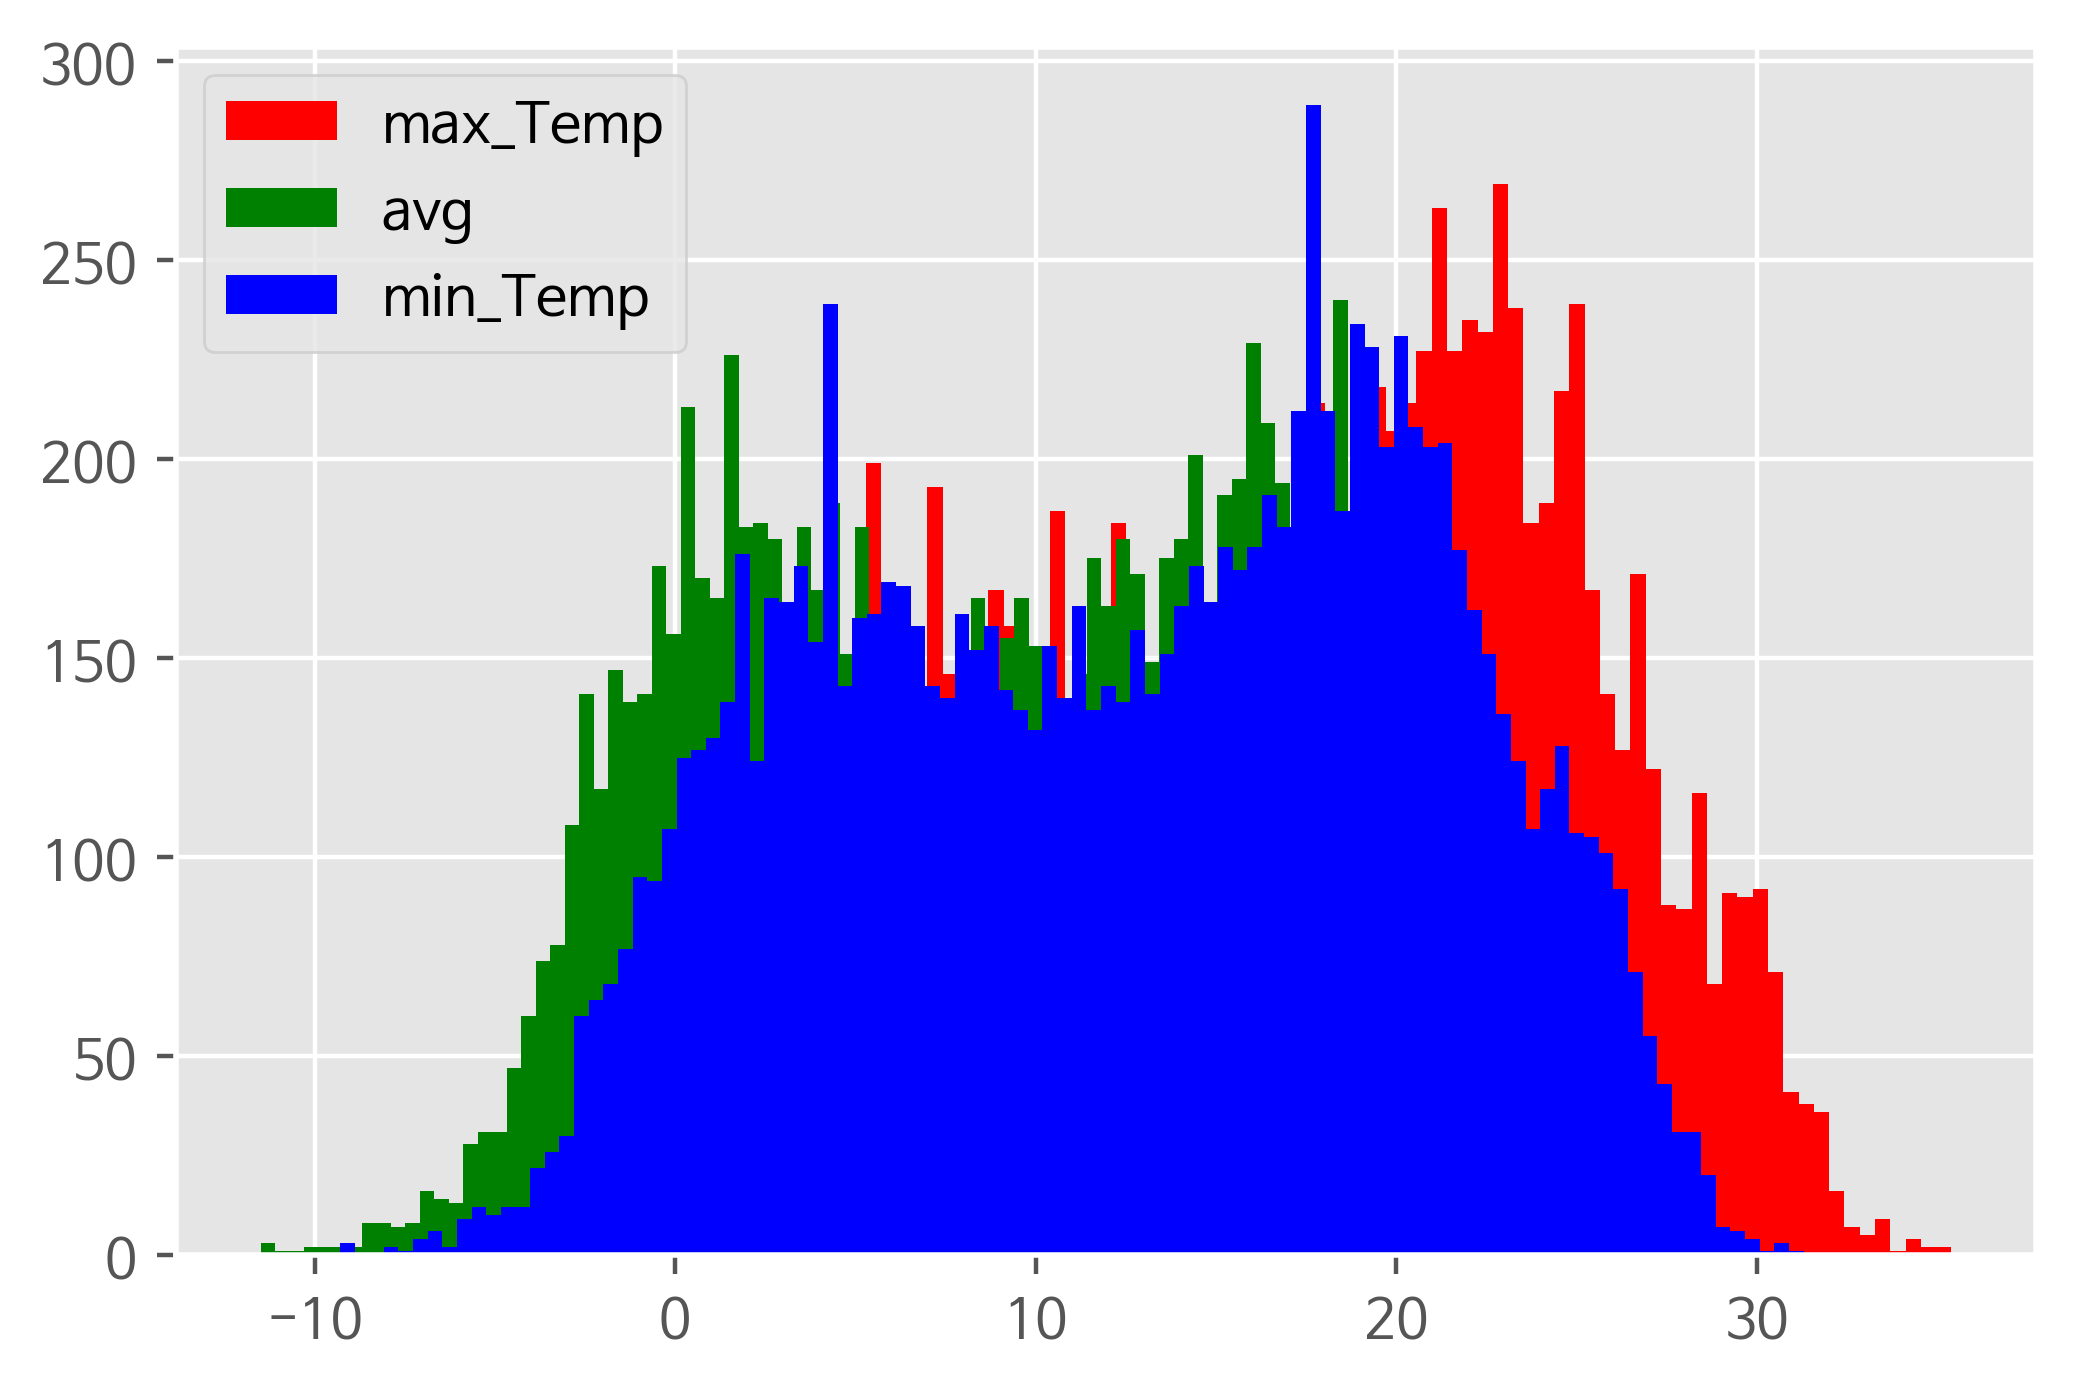

In [ ]:
# 최고 기온 데이터 히스토그램으로 표현하기
import csv
import matplotlib.pyplot as plt

f = open('/content/ulleung.csv', encoding='cp949')
data = csv.reader(f)
next(data) #헤더

max_Temp = [] #최고 기온 데이터를 저장할 리스트 생성
avg= [] #평균 기온 데이터를 저장할 리스트 생성
min_Temp = [] #최소 기온 데이터를 저장할 리스트 생성

for row in data:
  if row[-1] != '' : #최고 기온 데이터 값이 존재하면 (결측치 제외)
    max_Temp.append(float(row[-1]))
  if row[-2] != '' : #최고 기온 데이터 값이 존재하면 (결측치 제외)
    avg.append(float(row[-2]))
  if row[-3] != '' :
    min_Temp.append(float(row[-3])) #평균 기온 데이터 값이 존재하면 (결측지 제외)
                    

plt.figure(dpi=200)
plt.hist(max_Temp, bins=100, color='r', label ='max_Temp') #bins=> 구간 옵션 100까지 
plt.hist(avg, bins=100, color='g', label='avg')
plt.hist(min_Temp, bins=100, color='b', label='min_Temp')

plt.legend()
plt.show()

2) 상자그림을 활용한 울릉도 최고 기온 vs 서울 최고 기온

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


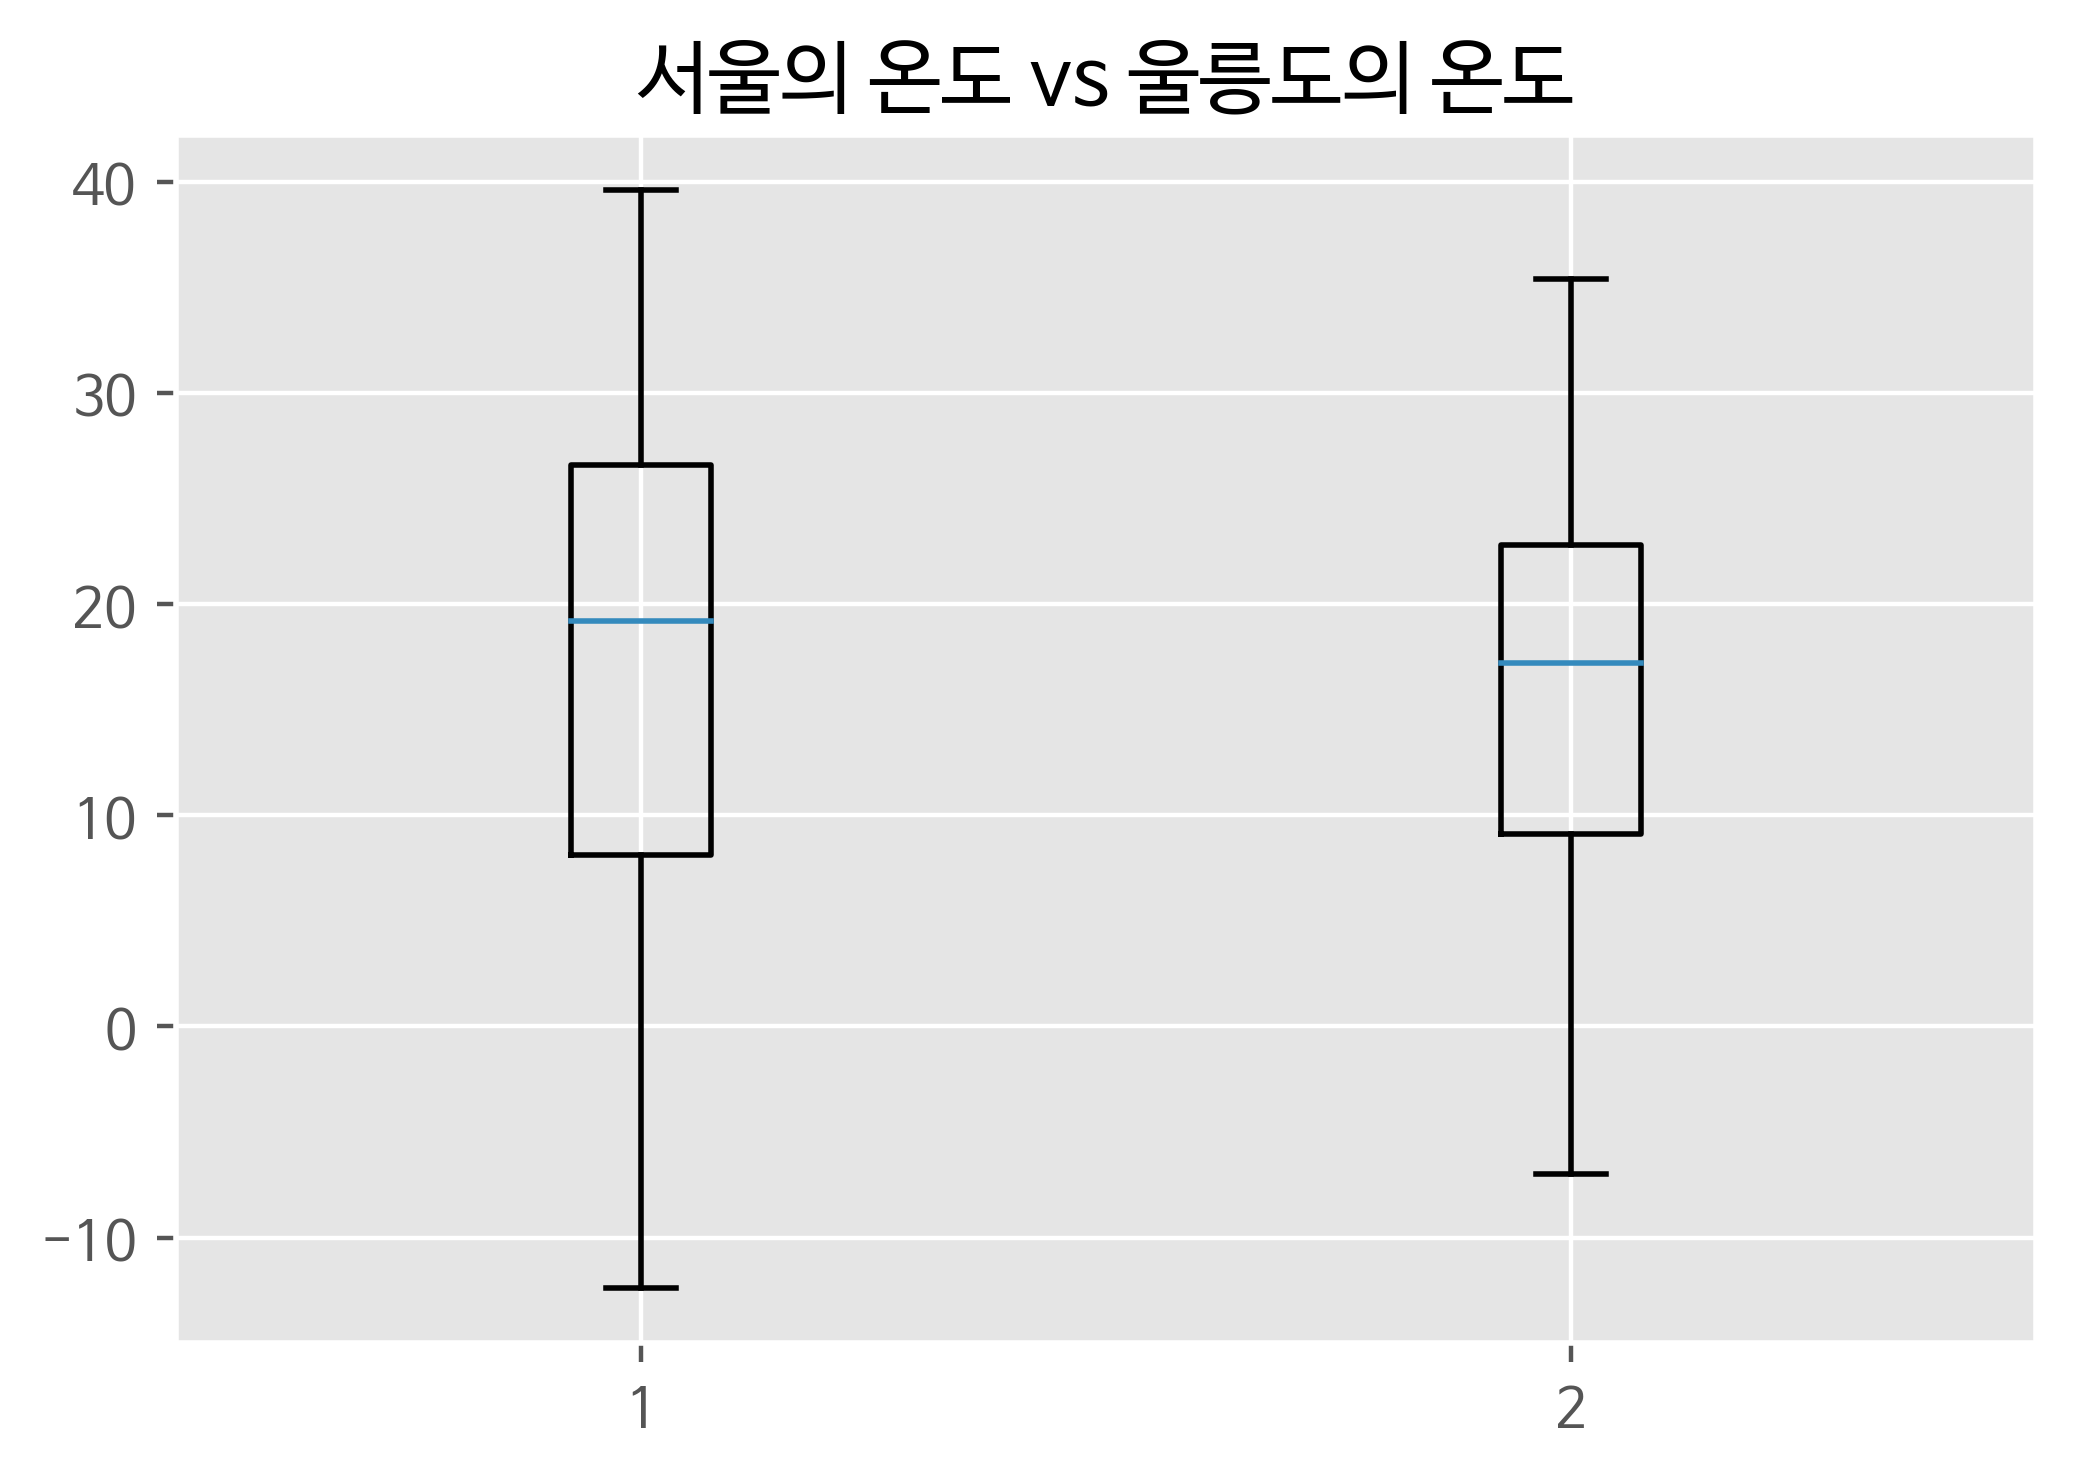

In [ ]:
import csv
import matplotlib.pyplot as plt


f1 = open('/content/seoul.csv',encoding= 'cp949')
f2 = open('/content/ulleung.csv',encoding ='cp949')

data1 = csv.reader(f1)
data2 = csv.reader(f2)
next(data1) #헤더
next(data2)

result1 = [] # 서울의 최고 기온 담기   
result2 = [] # 을릉도의 최고 기온 담기 

for row in data1:
  year = int(row[0].split('-')[0]) # year 변수에 날짜를 '-'로 스플릿 한 후 저장 
  if row[-1] != '':
    if year >= 1990:  # 을릉도 데이터는 1970년대 부터 뽑았기 때문에 서울데이터도 1970년 부터 추출  
      result1.append(float(row[-1]))

for row in data2:
  year = int(row[0].split('-')[0])
  if row[-1] != '':
    if year < 2020:
      result2.append(float(row[-1]))

plt.figure(dpi=200)
plt.title('서울의 온도 vs 울릉도의 온도')
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
plt.boxplot([result1,result2])
plt.style.use('ggplot')# 그래프 스타일 지정
plt.show()

3) 월별 울릉도 최고기온 상자 그림 그리기

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


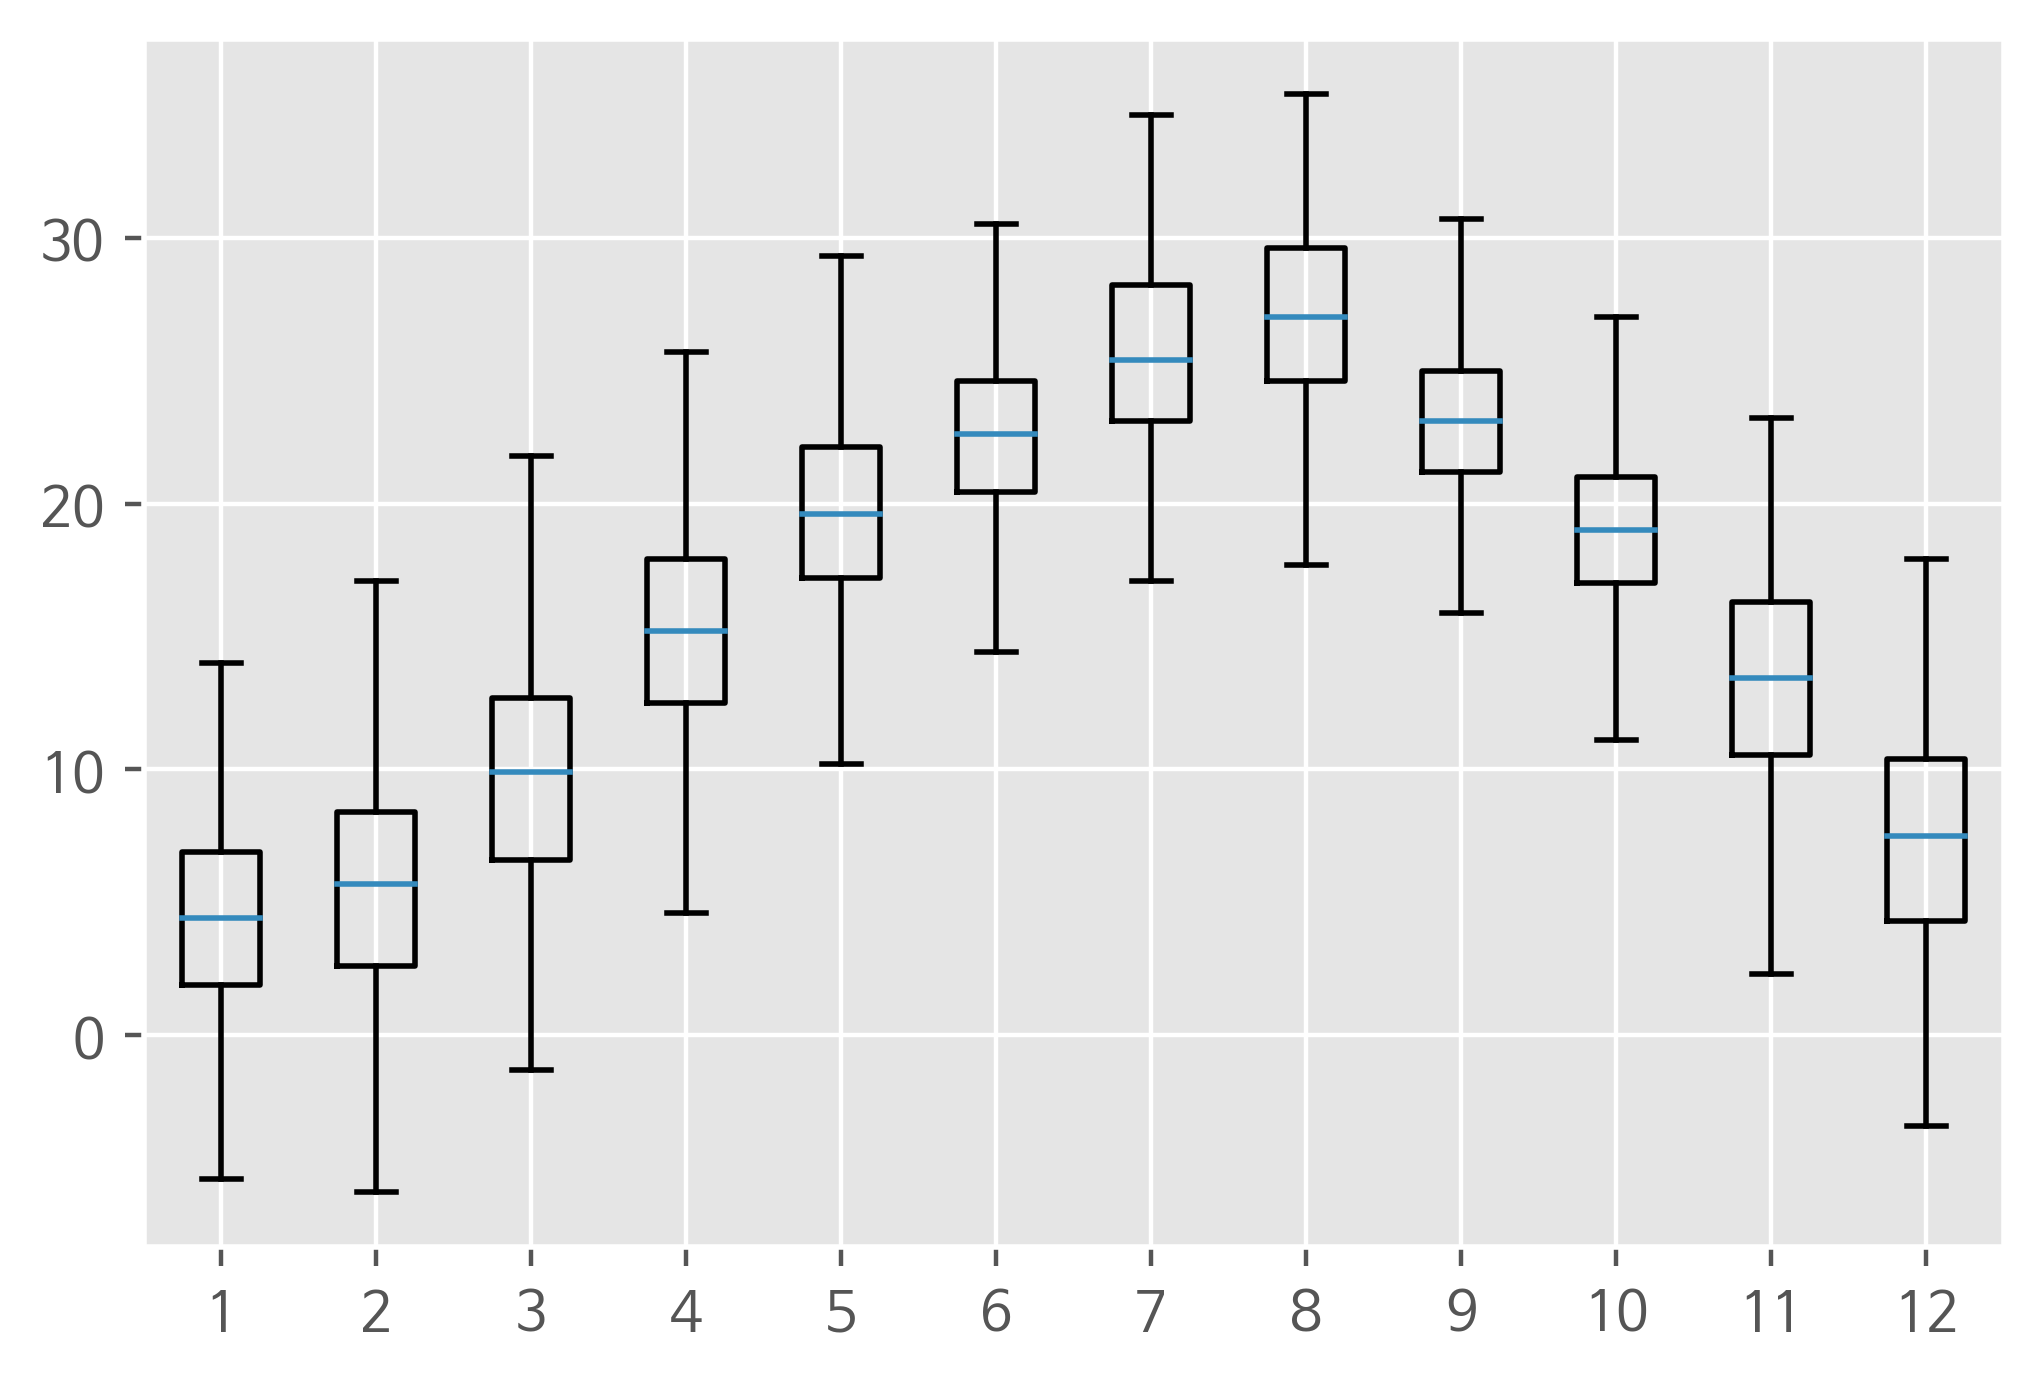

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('/content/ulleung.csv', encoding='cp949')
data = csv.reader(f)
next(data)

month=[] #월별 데이터를 저장할 리스트 month 변수 선언
for i in range(12) :
  month.append([]) #월별 데이터 저장할 month 변수 선언

for row in data:
  if row[-1] != '' :
    month[int(row[0].split('-')[1])-1].append(float(row[-1]))
# 월과 같은 번호의 인덱스에 월별 데이터 저장 (예: 1월 row[0].split('-')[1] -> month[0] row[0].split('-')[1]-1 , 2월 -> month[1])

plt.figure(dpi=200)
plt.boxplot(month, showfliers=False)
#리스트 형태로 그리는 것이 좋음 리스트로 안 그리면 하나 위에 다른 것이 쌓이고 쌓이는 형식으로 그려짐
plt.show()

4) 특정 달의 일별 최고 기온 상자 그림 그리기
- 11월(이유: 김채현의 탄생 월)

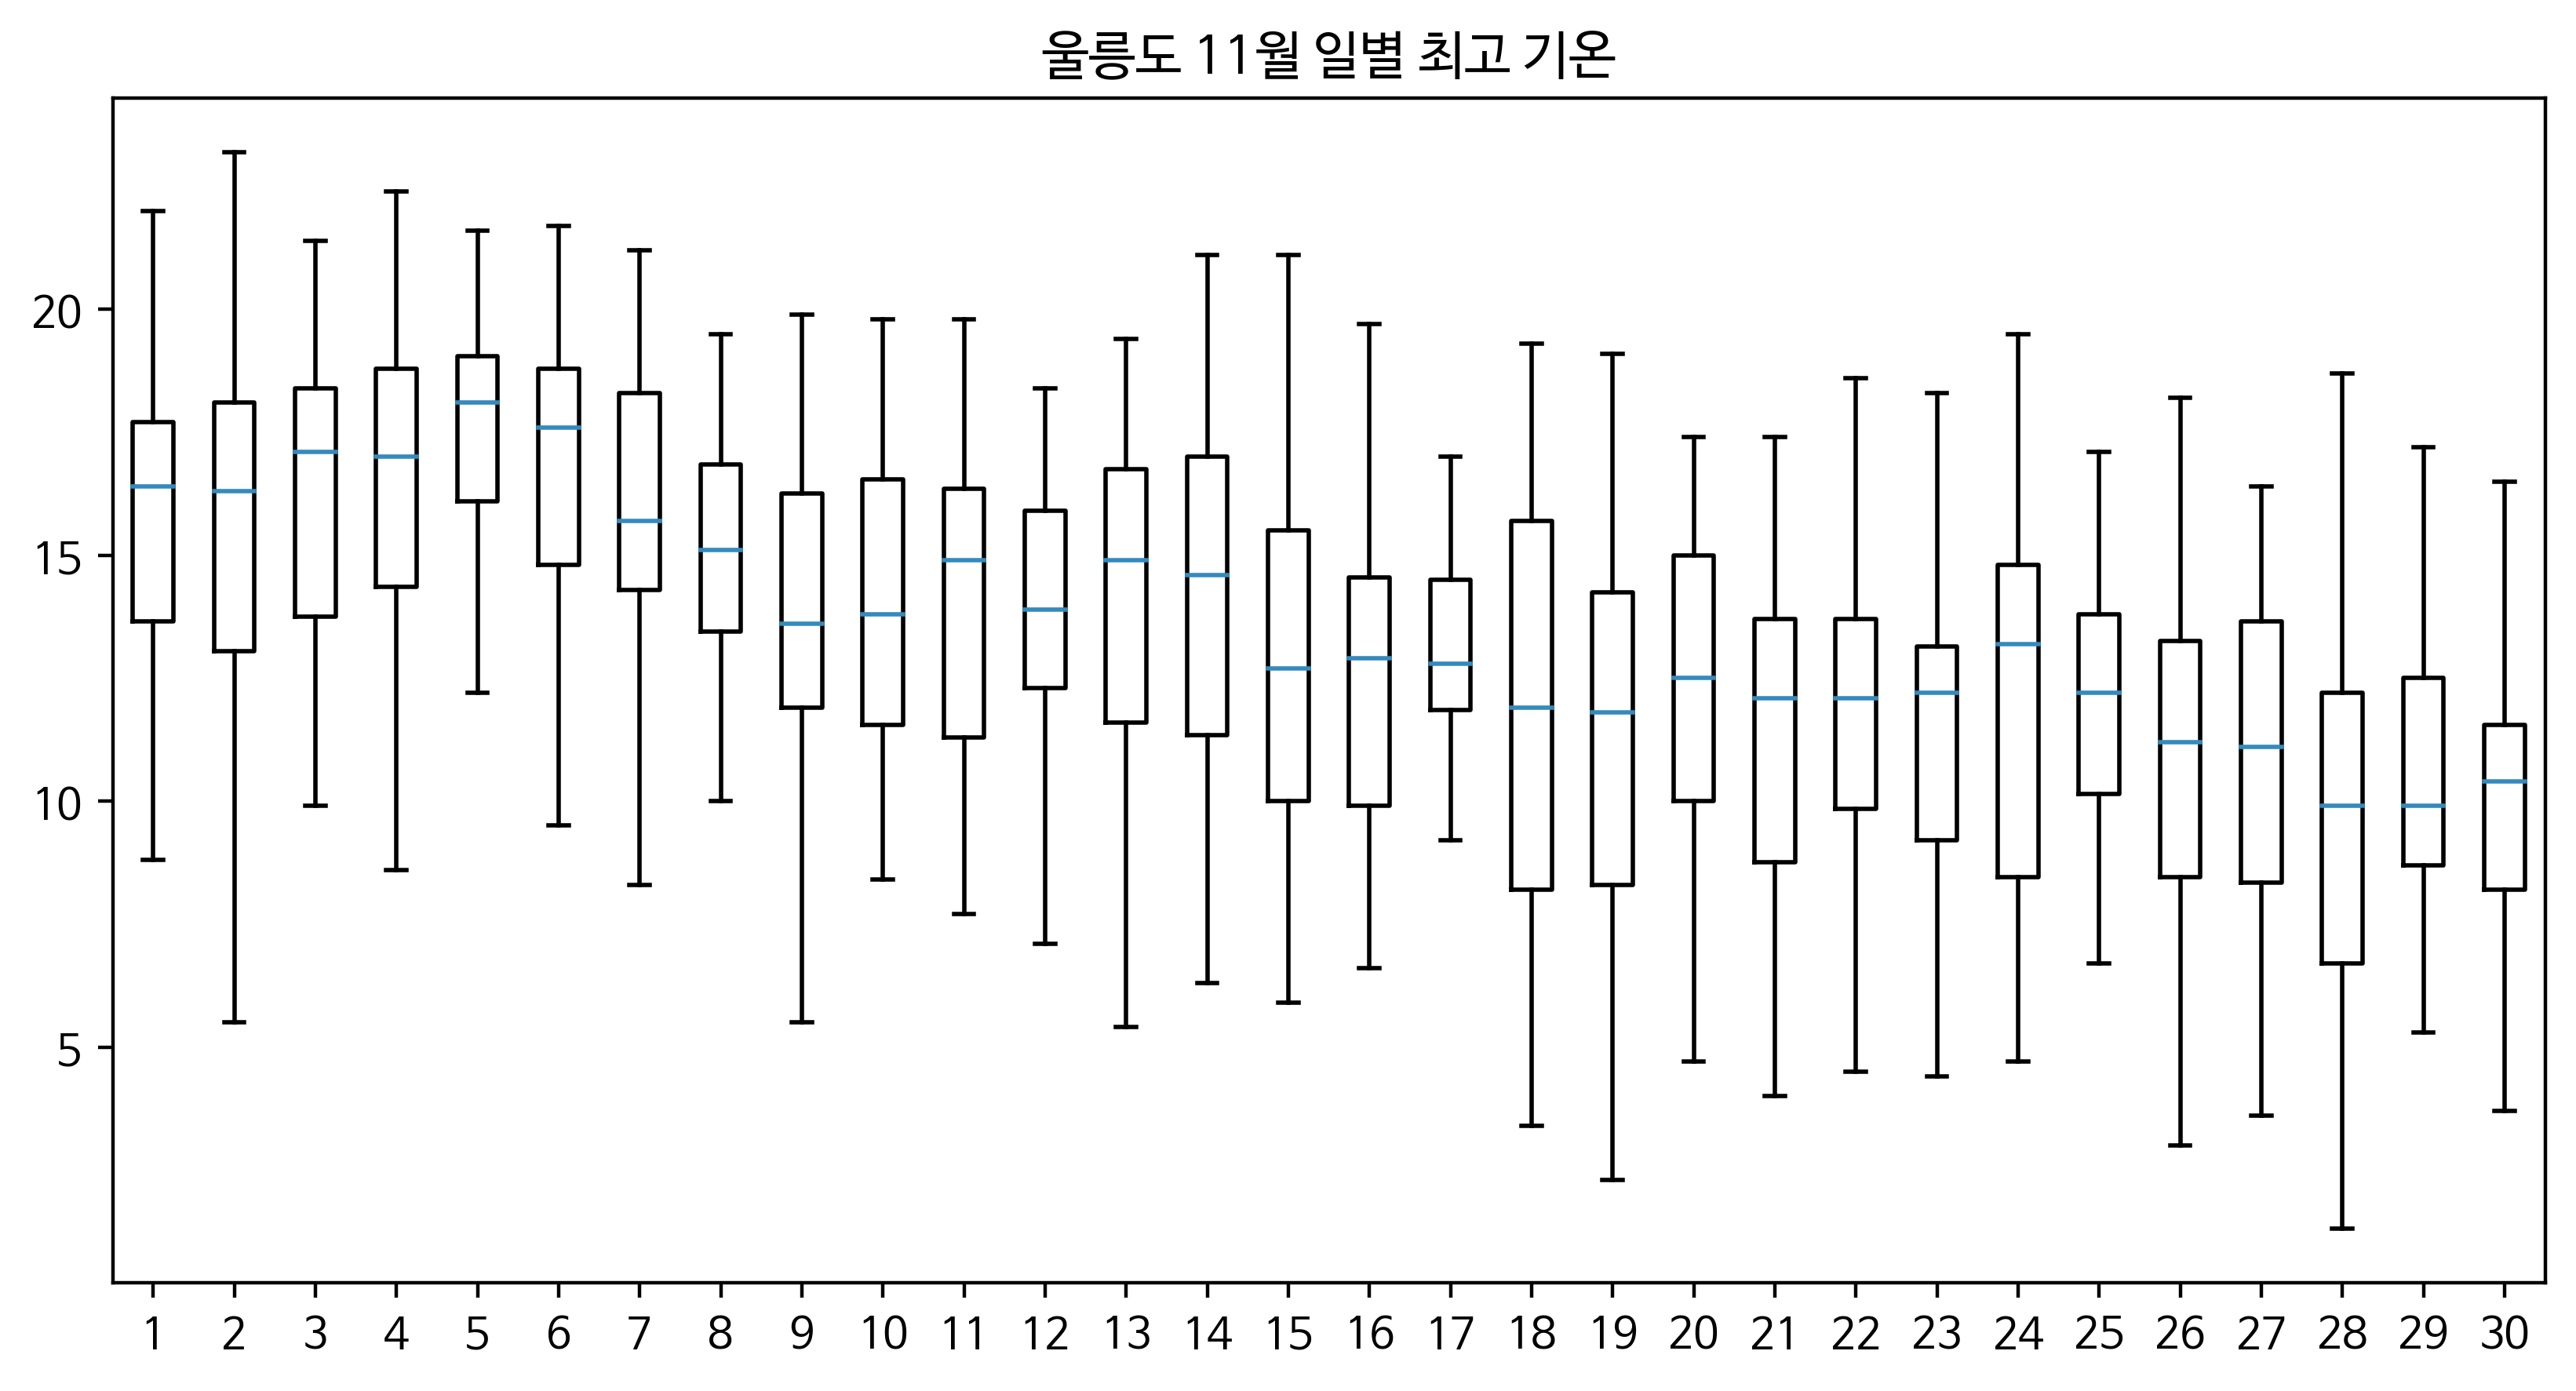

In [ ]:
#['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']

import csv
import matplotlib.pyplot as plt

f = open('/content/ulleung.csv', encoding='cp949')
data = csv.reader(f)
next(data)

day = [] #일별 데이터를 저장할 리스트 day 변수 선언
for i in range(30) : #11월은 30일까지만 있음
  day.append([]) #day 리스트 내에 31개 리스트 생성[[], [], [], [],...31개]

for row in data:
  if row[-1] != '' : #row[-1] : 최고기온
    if row[0].split('-')[1] == '11' : # 11월 최고 기온 값 저장 day[0] -> 1일
       day[int(row[0].split('-')[2])-1].append(float(row[-1]))
 


#<<차트 설정>>
plt.figure(figsize=(10,5), dpi=200)
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

plt.title('울릉도 11월 일별 최고 기온')
plt.boxplot(day, showfliers=False) #아웃라이터(이상치) 값 생략 showfliers
plt.style.use('ggplot') #ggplot 격자문의 회색 그래프
plt.show()

한글 깨짐 처리하기

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:


#울릉도 19900101~20210531
#서울 1907~2019

import csv
import matplotlib.pyplot as plt

f = open('seoul.csv', encoding='cp949')
data = csv.reader(f)
next(data) #헤더

seoulMax = [] # 서울 최고 기온 데이터를 저장할 리스트 생성
ulleungMax = [] #울릉도 최고 기온 데이터를 저장할 리스트 생성


for row in data:
  if row[-1] != '' : #서울 최고 기온 데이터 값 (결측치 제외)
    if 1990 <= int(seouMax.append(float(row[-1]))
  


for row in data : 
  if row[-1] != '' and row[-2] != '' :
    if 1997 <= int(row[0].split('-')[0]): #'1983' 문자열로 넣으면 같은 걸 찾을 수는 있는데 큰 값은 못 찾음
    #뒤 문자열을 int 숫자형으로 바꿔야 크기 비교 가능함
      if row[0].split('-')[1] == '12' and row[0].split('-')[2] == '24':
        high.append(float(row[-1]))
        low.append(float(row[-2]))
plt.figure(dpi = 200)
plt.boxplot(result)
plt.show()   
    

plt.figure(dpi=200)
plt.boxplot([aug, jau])
#리스트 형태로 그리는 것이 좋음 리스트로 안 그리면 하나 위에 다른 것이 쌓이고 쌓이는 형식으로 그려짐
plt.show()

import csv
import matplotlib.pyplot as plt